In [ ]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
heart_data = pd.read_csv('health_disease_dataset.csv')
heart_data

heart_data.info()

In [2]:
#summary statistics
heart_data.describe()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.094186,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.296921,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.292087,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.698160,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,2.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [3]:
#checking for missing value
missing_values = heart_data.isnull().sum()
print(missing_values)

HeartDiseaseorAttack    0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
Diabetes                0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64


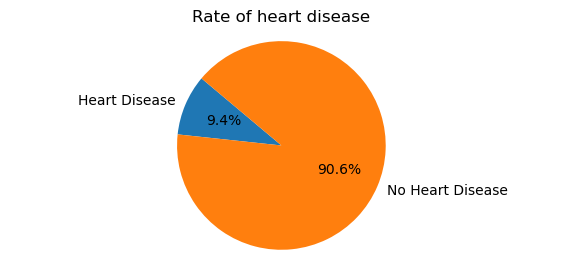

In [4]:
#EDA Processing
total_heartds = (heart_data["HeartDiseaseorAttack"] == 1.0).sum()
total_nonheartds = (heart_data["HeartDiseaseorAttack"] == 0.0).sum()
count = [total_heartds, total_nonheartds]
labels_count = ['Heart Disease', 'No Heart Disease']

plt.figure(figsize=(7, 3))
plt.pie(count, labels=labels_count, autopct='%1.1f%%', startangle=140)
plt.title('Rate of heart disease')

plt.axis('equal')
plt.show()

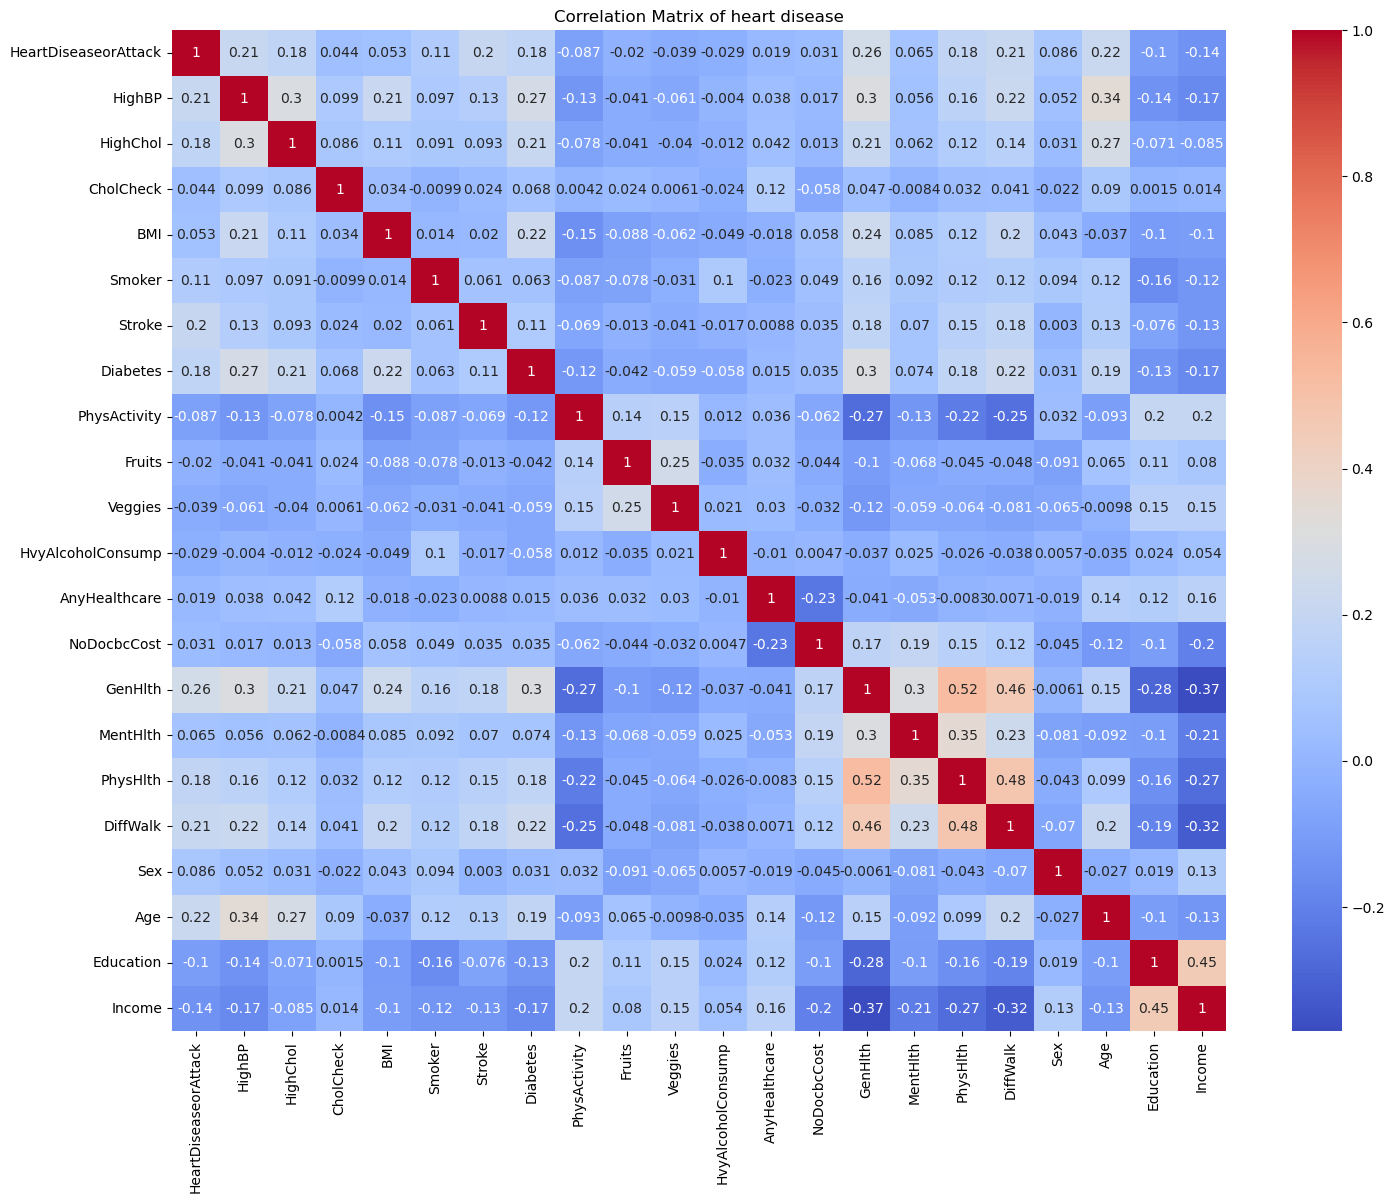

In [5]:
# Correlation matrix
corr_matrix = heart_data.corr()
plt.figure(figsize=(17, 13))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of heart disease')
plt.show()

## correlation index between variables is quite low, it indicates that there might be no multicolinearity between variables

Text(0.5, 1.0, ' heart disease')

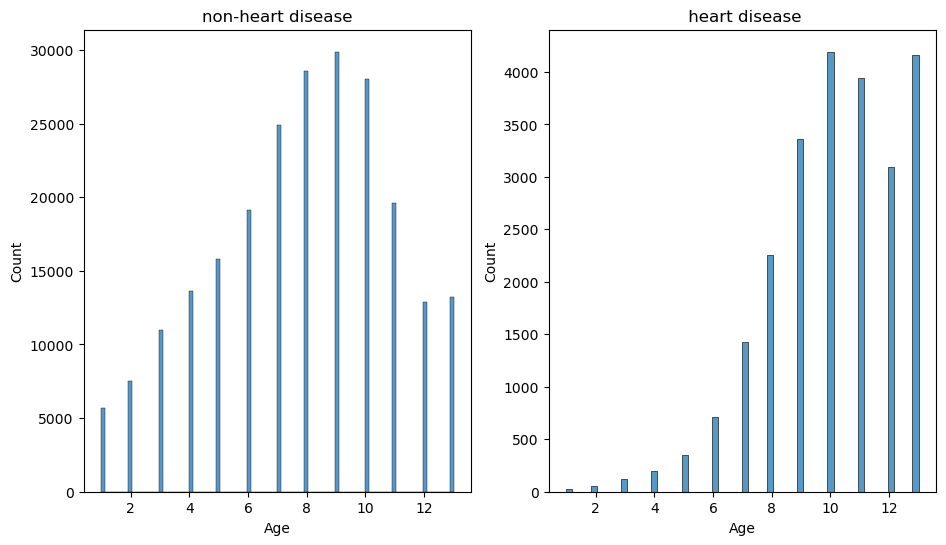

In [6]:
# heart disease by age
non_heartds= heart_data[heart_data['HeartDiseaseorAttack']==0.0]
heartds= heart_data[heart_data['HeartDiseaseorAttack']==1.0]

fig,axes=plt.subplots(1,2,figsize=(11,6))

sns.histplot(ax=axes[0],x=non_heartds['Age'])
sns.histplot(ax=axes[1],x=heartds["Age"])
axes[0].set_title("non-heart disease")
axes[1].set_title(" heart disease")

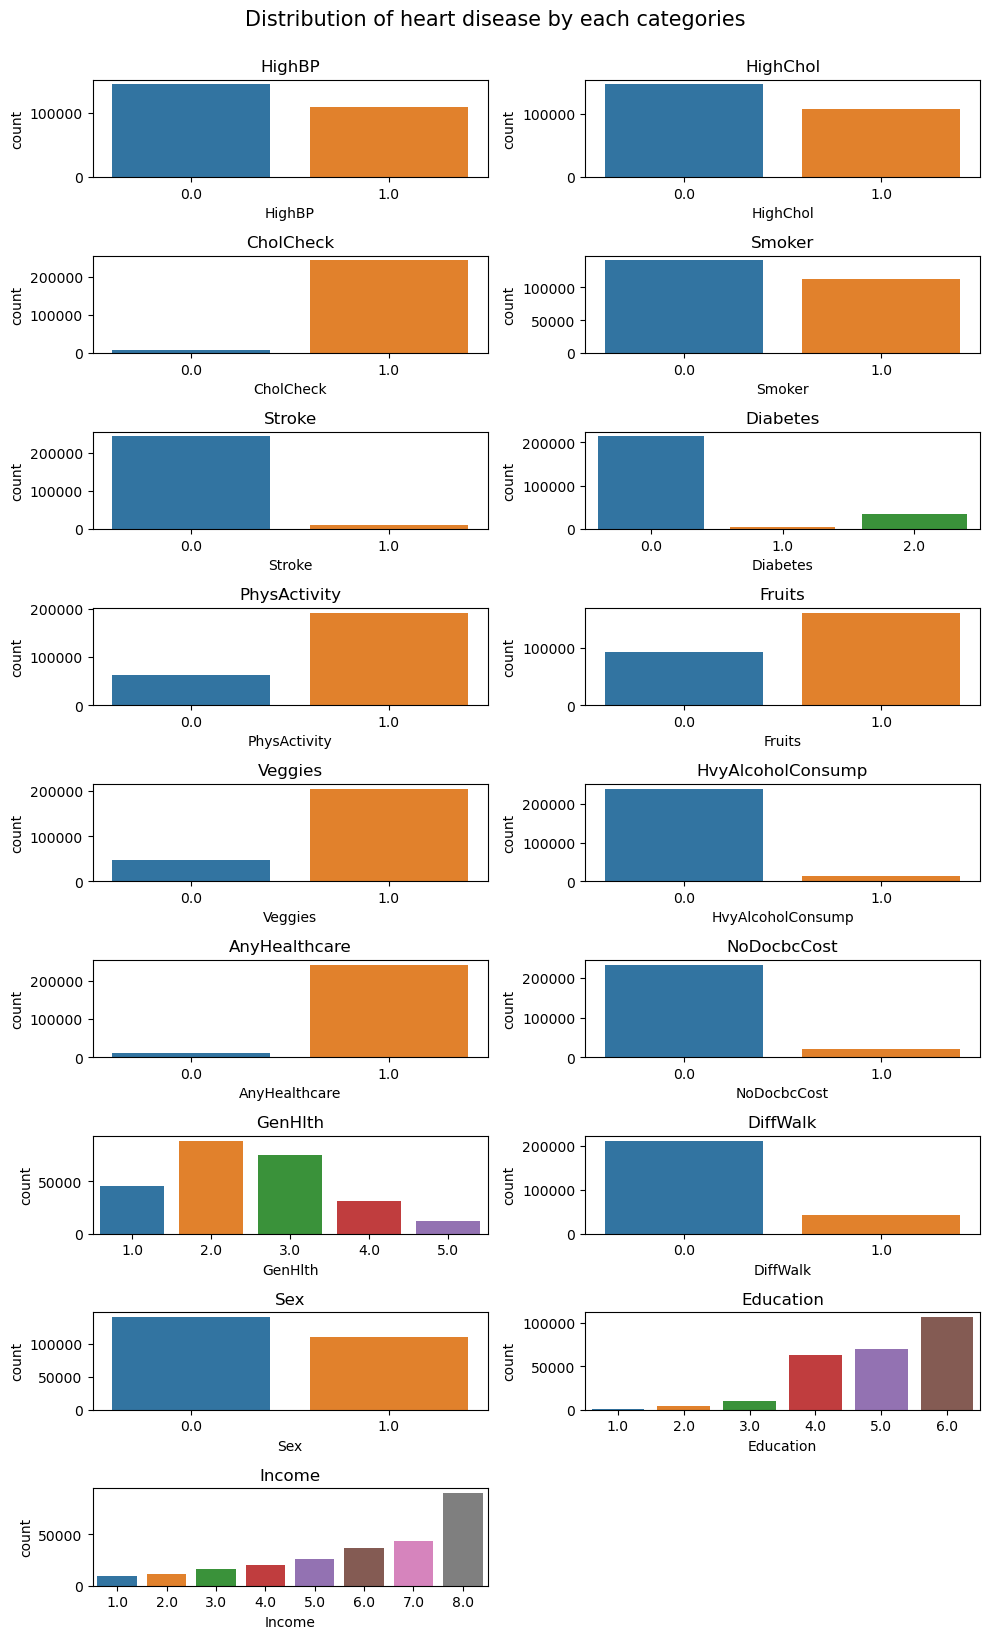

In [7]:
heart_data.columns
columns = ['HighBP', 'HighChol', 'CholCheck',
       'Smoker', 'Stroke', 'Diabetes', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'DiffWalk', 'Sex', 'Education',
       'Income']
plt.figure(figsize=(10,30))
for i,column in enumerate(columns):
    plt.subplot(len(columns), 2, i+1)
    plt.suptitle("Distribution of heart disease by each categories", fontsize=15, x=0.5, y=1)
    sns.countplot(data=heart_data, x=column)
    plt.title(f"{column}")
    plt.tight_layout()

In [2]:
# balancing the data with SMOTE method
from imblearn.over_sampling import SMOTE
columns_to_exclude = ['Fruits', 'Veggies', 'Education', 'Income', 'MentHlth']
x = heart_data.drop(['HeartDiseaseorAttack'] + columns_to_exclude, axis=1)
y=heart_data[['HeartDiseaseorAttack']]
smote = SMOTE(random_state=42)
x_balanced, y_balanced = smote.fit_resample(x, y)


In [3]:

# splitting the dataset with  70% training and 30% testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_balanced, y_balanced, test_size=0.3, random_state=42)

In [25]:
# make predictions using Logistic regression model
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

# Fit the model on the balanced training data
logreg.fit(x_train, y_train)

# Make predictions on the scaled test data
predictions = logreg.predict(x_test)
# evaluate performance of model 
from sklearn.metrics import classification_report, accuracy_score

print("Testing Results:\n")
print(classification_report(y_test, predictions))
print("Accuracy:", accuracy_score(y_test, predictions))

# significant variables selection based on p-value

import statsmodels.api as sm
logit_model=sm.Logit(y_test,x_test)
result=logit_model.fit()
print(result.summary2())

C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Testing Results:

              precision    recall  f1-score   support

         0.0       0.79      0.75      0.77     68961
         1.0       0.76      0.80      0.78     68912

    accuracy                           0.77    137873
   macro avg       0.78      0.77      0.77    137873
weighted avg       0.78      0.77      0.77    137873

Accuracy: 0.7743358017886025
Optimization terminated successfully.
         Current function value: 0.504130
         Iterations 6
                            Results: Logit
Model:              Logit                Pseudo R-squared: 0.273      
Dependent Variable: HeartDiseaseorAttack AIC:              139043.8018
Date:               2024-04-19 19:21     BIC:              139201.1472
No. Observations:   137873               Log-Likelihood:   -69506.    
Df Model:           15                   LL-Null:          -95566.    
Df Residuals:       137857               LLR p-value:      0.0000     
Converged:          1.0000               Scale:        

AUC: 0.8498461173817984


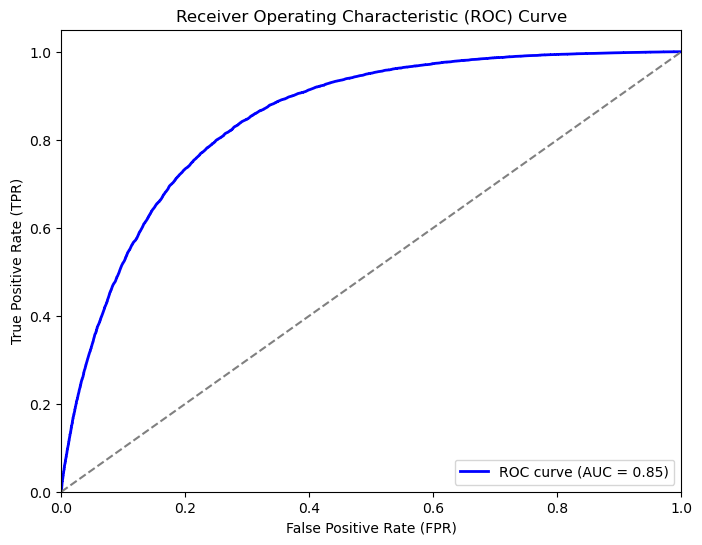

In [26]:
# plot ROC curve and AUC for Logistic model
from sklearn.metrics import roc_auc_score, roc_curve

# Calculate the predicted probabilities for the positive class (class 1)
y_prob = logreg.predict_proba(x_test)[:, 1]

# Calculate the AUC
auc = roc_auc_score(y_test, y_prob)

print("AUC:", auc)

#plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [4]:
# make predictions using Random Forest model
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier
Rforest = RandomForestClassifier(random_state=11)
Rforest.fit(x_train, y_train)
predictions_rf = Rforest.predict(x_test)
print("Testing Results:\n")
print(classification_report(y_test, predictions_rf))
print("Accuracy:", accuracy_score(y_test, predictions_rf))

C:\Users\HP\AppData\Local\Temp\ipykernel_11032\716260360.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  Rforest.fit(x_train, y_train)


Testing Results:

              precision    recall  f1-score   support

         0.0       0.92      0.94      0.93     68961
         1.0       0.94      0.91      0.93     68912

    accuracy                           0.93    137873
   macro avg       0.93      0.93      0.93    137873
weighted avg       0.93      0.93      0.93    137873

Accuracy: 0.9282238001639189


AUC (Random Forest): 0.977462164944604


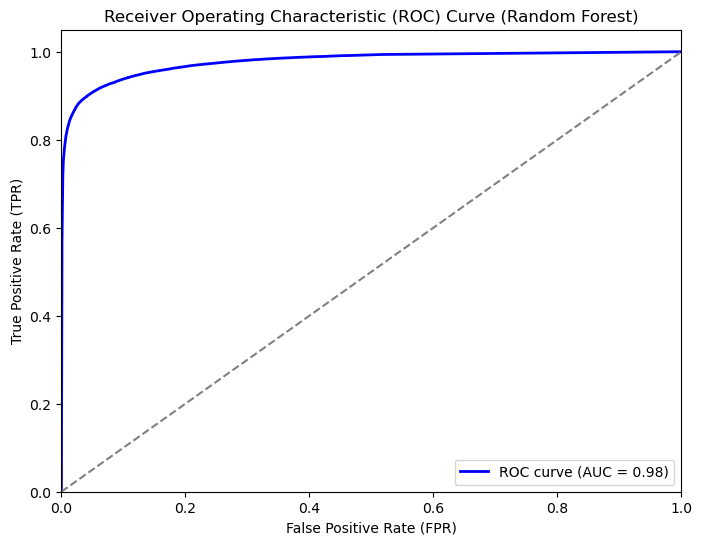

In [28]:
#compute AUC and plot ROC Curve for RANDOM FOREST
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

y_prob_rf = Rforest.predict_proba(x_test)[:, 1]

# Calculate the AUC
auc_rf = roc_auc_score(y_test, y_prob_rf)

print("AUC (Random Forest):", auc_rf)

fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_prob_rf)

plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % auc_rf)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve (Random Forest)')
plt.legend(loc='lower right')
plt.show()

In [29]:
# make predictions using Decision Tree model
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
tree = DecisionTreeClassifier(random_state=11)

# Fit the model on the balanced training data
tree.fit(x_train, y_train)

# Make predictions on the scaled test data
predictions_tree = tree.predict(x_test)

# Evaluate the performance of the Decision Tree model
print("Testing Results:\n")
print(classification_report(y_test, predictions_tree))
print("Accuracy:", accuracy_score(y_test, predictions_tree))

Testing Results:

              precision    recall  f1-score   support

         0.0       0.91      0.91      0.91     68961
         1.0       0.91      0.91      0.91     68912

    accuracy                           0.91    137873
   macro avg       0.91      0.91      0.91    137873
weighted avg       0.91      0.91      0.91    137873

Accuracy: 0.9103957990324429


AUC (Decision Tree): 0.9250817295348495


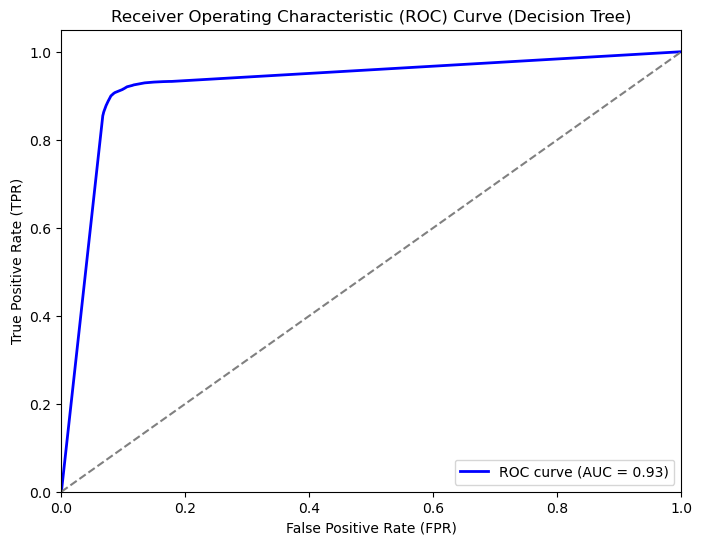

In [31]:
#compute AUC and plot ROC Curve for Decision Tree
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

y_prob_tree = tree.predict_proba(x_test)[:, 1]

# Calculate the AUC
auc_tree = roc_auc_score(y_test, y_prob_tree)

print("AUC (Decision Tree):", auc_tree)

# Calculate the false positive rate (fpr) and true positive rate (tpr)
fpr_tree, tpr_tree, thresholds_tree = roc_curve(y_test, y_prob_tree)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_tree, tpr_tree, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % auc_tree)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve (Decision Tree)')
plt.legend(loc='lower right')
plt.show()

In [32]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

knn = KNeighborsClassifier()

# Fit the model on the balanced training data
knn.fit(x_train, y_train)

# Make predictions on the scaled test data
predictions_knn = knn.predict(x_test)

# Evaluate the performance of the KNN model
print("Testing Results:\n")
print(classification_report(y_test, predictions_knn))
print("Accuracy:", accuracy_score(y_test, predictions_knn))

C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Testing Results:

              precision    recall  f1-score   support

         0.0       0.91      0.78      0.84     68961
         1.0       0.81      0.93      0.86     68912

    accuracy                           0.85    137873
   macro avg       0.86      0.85      0.85    137873
weighted avg       0.86      0.85      0.85    137873

Accuracy: 0.8538655139149798


AUC (KNN): 0.9221514368235988


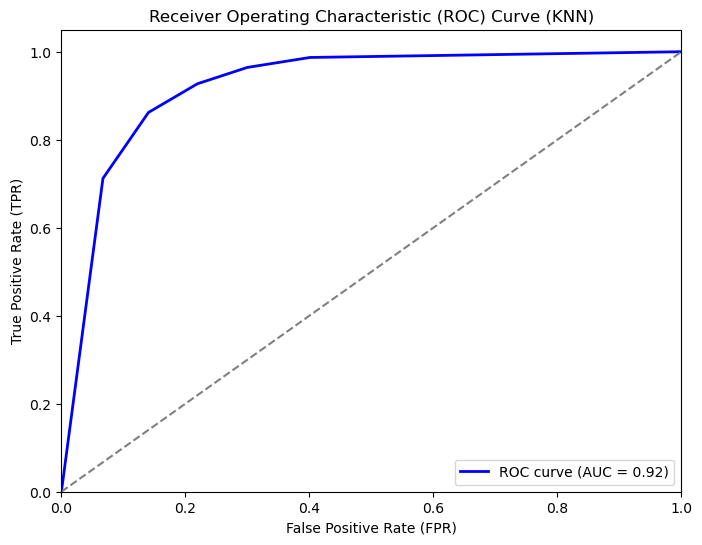

In [33]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Calculate the predicted probabilities for the positive class (class 1)
y_prob_knn = knn.predict_proba(x_test)[:, 1]

# Calculate the AUC
auc_knn = roc_auc_score(y_test, y_prob_knn)

print("AUC (KNN):", auc_knn)

# Calculate the false positive rate (fpr) and true positive rate (tpr)
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, y_prob_knn)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_knn, tpr_knn, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % auc_knn)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve (KNN)')
plt.legend(loc='lower right')

In [13]:
import joblib
joblib.dump(Rforest, 'random_forest_model.pkl')

import os

print("Current working directory:", os.getcwd())

Current working directory: C:\Users\HP


In [4]:
!pip install ipywidgets
from ipywidgets import ToggleButtons, FloatSlider, Dropdown, IntSlider, interactive_output, VBox, HBox
import ipywidgets as widgets

def predict_heart_disease(high_bp, high_chol, chol_check, bmi, smoker, stroke, diabetes, phys_activity,
                          heavy_alcohol_consump, any_healthcare, no_doc_cost, general_health,
                          physical_health, diff_walk, sex, age):
    # Prepare input data for prediction
    input_data = pd.DataFrame({
        'HighBP': [high_bp],
        'HighChol': [high_chol],
        'CholCheck': [chol_check],
        'BMI': [bmi],
        'Smoker': [smoker],
        'Stroke': [stroke],
        'Diabetes': [diabetes],
        'PhysActivity': [phys_activity],
        'HvyAlcoholConsump': [heavy_alcohol_consump],
        'AnyHealthcare': [any_healthcare],
        'NoDocbcCost': [no_doc_cost],
        'GenHlth': [general_health],
        'PhysHlth': [physical_health],
        'DiffWalk': [diff_walk],
        'Sex': [sex],
        'Age': [age]
    })
    
    # Make prediction using the random forest model
    prediction = Rforest.predict(input_data)
    prediction_prob = Rforest.predict_proba(input_data)[:, 1]
    
    return prediction, prediction_prob

# Define widgets for input fields
high_bp_widget = ToggleButtons(options=[0, 1], description='High Blood Pressure:')
high_chol_widget = ToggleButtons(options=[0, 1], description='High Cholesterol:')
chol_check_widget = ToggleButtons(options=[0, 1], description='Cholesterol Check:')
bmi_widget = FloatSlider(value=25, min=10, max=50, step=1, description='BMI:')
smoker_widget = ToggleButtons(options=[0, 1], description='Smoker:')
stroke_widget = ToggleButtons(options=[0, 1], description='Stroke:')
diabetes_widget = Dropdown(options=[0, 1, 2], value=0, description='Diabetes:')
phys_activity_widget = ToggleButtons(options=[0, 1], description='Physical Activity:')
heavy_alcohol_consump_widget = ToggleButtons(options=[0, 1], description='Heavy Alcohol Consumption:')
any_healthcare_widget = ToggleButtons(options=[0, 1], description='Any Healthcare:')
no_doc_cost_widget = ToggleButtons(options=[0, 1], description='No Doctor Cost:')
general_health_widget = IntSlider(value=3, min=1, max=5, step=1, description='General Health:')
physical_health_widget = IntSlider(value=0, min=0, max=30, step=1, description='Physical Health:')
diff_walk_widget = ToggleButtons(options=[0, 1], description='Difficulty Walking:')
sex_widget = ToggleButtons(options=[0, 1], description='Sex:')
age_widget = IntSlider(value=50, min=20, max=90, step=1, description='Age:')

# Create the interactive output
output = interactive_output(predict_heart_disease, {
    'high_bp': high_bp_widget,
    'high_chol': high_chol_widget,
    'chol_check': chol_check_widget,
    'bmi': bmi_widget,
    'smoker': smoker_widget,
    'stroke': stroke_widget,
    'diabetes': diabetes_widget,
    'phys_activity': phys_activity_widget,
    'heavy_alcohol_consump': heavy_alcohol_consump_widget,
    'any_healthcare': any_healthcare_widget,
    'no_doc_cost': no_doc_cost_widget,
    'general_health': general_health_widget,
    'physical_health': physical_health_widget,
    'diff_walk': diff_walk_widget,
    'sex': sex_widget,
    'age': age_widget
})

# Display widgets for input fields
inputs = VBox([
    high_bp_widget, high_chol_widget, chol_check_widget, bmi_widget, smoker_widget,
    stroke_widget, diabetes_widget, phys_activity_widget, heavy_alcohol_consump_widget,
    any_healthcare_widget, no_doc_cost_widget, general_health_widget, physical_health_widget,
    diff_walk_widget, sex_widget, age_widget
])

display(HBox([inputs, output]))

# Create button to trigger prediction
predict_button = widgets.Button(description="Predict")

def on_predict_button_clicked(b):
    prediction, prediction_prob = predict_heart_disease(high_bp_widget.value, high_chol_widget.value, chol_check_widget.value,
                                                        bmi_widget.value, smoker_widget.value, stroke_widget.value,
                                                        diabetes_widget.value, phys_activity_widget.value,
                                                        heavy_alcohol_consump_widget.value, any_healthcare_widget.value,
                                                        no_doc_cost_widget.value, general_health_widget.value,
                                                        physical_health_widget.value, diff_walk_widget.value,
                                                        sex_widget.value, age_widget.value)
    print("Prediction:", prediction)
    print("Prediction Probability for heart disease:", prediction_prob)

predict_button.on_click(on_predict_button_clicked)

display(HBox([inputs, predict_button]))

In [2]:
## Streamlit Web-app

!pip install streamlit
import streamlit as st
# Define the prediction function
def predict_heart_disease(high_bp, high_chol, chol_check, bmi, smoker, stroke, diabetes, phys_activity,
                          heavy_alcohol_consump, any_healthcare, no_doc_cost, general_health,
                          physical_health, diff_walk, sex, age):
    # Prepare input data for prediction
    input_data = pd.DataFrame({
        'HighBP': [high_bp],
        'HighChol': [high_chol],
        'CholCheck': [chol_check],
        'BMI': [bmi],
        'Smoker': [smoker],
        'Stroke': [stroke],
        'Diabetes': [diabetes],
        'PhysActivity': [phys_activity],
        'HvyAlcoholConsump': [heavy_alcohol_consump],
        'AnyHealthcare': [any_healthcare],
        'NoDocbcCost': [no_doc_cost],
        'GenHlth': [general_health],
        'PhysHlth': [physical_health],
        'DiffWalk': [diff_walk],
        'Sex': [sex],
        'Age': [age]
    })
    
    # Make prediction using the random forest model
    prediction = Rforest.predict(input_data)
    prediction_prob = Rforest.predict_proba(input_data)[:, 1]
    
    return prediction, prediction_prob

# Define the Streamlit app
def main():
    # Add a title to the app
    st.title("Heart Disease Prediction App")

    # Add input widgets for user input
    high_bp = st.radio("Do you have High Blood Pressure?:", options=[0, 1])
    high_chol = st.radio("Do you have High Cholesterol:", options=[0, 1])
    chol_check = st.radio("Cholesterol Check:", options=[0, 1])
    bmi = st.slider("BMI:", min_value=10, max_value=50, value=25, step=1)
    smoker = st.radio("Smoker:", options=[0, 1])
    stroke = st.radio("Stroke:", options=[0, 1])
    diabetes = st.selectbox("Diabetes:", options=[0, 1, 2])
    phys_activity = st.radio("Physical Activity:", options=[0, 1])
    heavy_alcohol_consump = st.radio("Heavy Alcohol Consumption:", options=[0, 1])
    any_healthcare = st.radio("Any Healthcare:", options=[0, 1])
    no_doc_cost = st.radio("No Doctor Cost:", options=[0, 1])
    general_health = st.slider("General Health:", min_value=1, max_value=5, value=3, step=1)
    physical_health = st.slider("Physical Health:", min_value=0, max_value=30, value=0, step=1)
    diff_walk = st.radio("Difficulty Walking:", options=[0, 1])
    sex = st.radio("Sex:", options=[0, 1])
    age = st.slider("Age:", min_value=20, max_value=90, value=50, step=1)

    # Add a button to trigger prediction
    if st.button("Predict"):
        prediction, prediction_prob = predict_heart_disease(high_bp, high_chol, chol_check, bmi, smoker, stroke,
                                                            diabetes, phys_activity, heavy_alcohol_consump,
                                                            any_healthcare, no_doc_cost, general_health,
                                                            physical_health, diff_walk, sex, age)
        st.write("Prediction:", prediction)
        st.write("Prediction Probability:", prediction_prob)

# Run the app
if __name__ == "__main__":
    main()

2024-04-25 21:15:20.747 
  command:

    streamlit run C:\Users\HP\anaconda3\lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


NameError: name 'Yes' is not defined

In [ ]:
!streamlit run web_app1.py

In [56]:
import os

# Get the current working directory
cwd = os.getcwd()

# Specify the filename
filename = "Capstone project(Final).py"

# Construct the full path to the file
file_path = os.path.join(cwd, filename)

print("Full path to the file:", file_path)

Full path to the file: C:\Users\HP\Capstone project(Final).py
